## Understanding the requirement of the client: 
Vrinda store wants to understand its sales for the 2022, so that they can improve the sales in 2023.Fot that we generate some sample questions.
- Compare the sales and order in single chart.
- which month had highest sales and order?
- who purchased more, Men or Women?
- Top 5 states contributing to sales?
- Relation between age and gender in purchase?
- Highest selling categories?
- Which channel contributes more to the sales?
- What is most order status?

## Collect the relevant data: 
Excel Dataset Download (direct): https://bit.ly/3X381ok

## Clean the data

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv(r"Vrinda Store Data Analysis.csv")

In [32]:
df.head(10)

index             Order ID  Cust ID Gender  Age       Date     Status  \
0      1  171-1029312-3038738  1029312  Women   44  12/4/2022  Delivered   
1      2  405-2183842-2225946  2183842  Women   29  12/4/2022  Delivered   
2      3  171-1641533-8921966  1641533  Women   67  12/4/2022  Delivered   
3      4  404-7490807-6300351  7490807  Women   20  12/4/2022  Delivered   
4      5  403-9293516-4577154  9293516  Women   62  12/4/2022  Delivered   
5      6  407-1298130-0368305  1298130    Men   49  12/4/2022  Delivered   
6      7  407-1298130-0368305  1298130      W   23  12/4/2022  Delivered   
7      8  171-5561216-3398711  5561216      W   70  12/4/2022  Delivered   
8      9  408-2935263-2935550  2935263      W   75  12/4/2022  Delivered   
9     10  404-2648970-9042715  2648970      W   43  12/4/2022  Delivered   

   Channel                       SKU       Category Size  Qty currency  \
0    Myntra  JNE1233-BLUE-KR-031-XXL          kurta  XXL    1      INR   
1      Ajio           SET414-KR-NP-L            Set    L    1      INR   
2    Myntra           SET261-KR-PP-S            Set    S    1      INR   
3    Amazon           SET110-KR-PP-M            Set    M    1      INR   
4    Myntra         JNE2294-KR-A-XXL          kurta  XXL    1      INR   
5  Flipkart           JNE3797-KR-XXL  Western Dress  XXL  One      INR   
6    Meesho           JNE3801-KR-XXL          kurta  XXL  One      INR   
7    Others             JNE3405-KR-M          kurta    M  One      INR   
8    Amazon          JNE3474-KR-E-XL          kurta   XL  One      INR   
9    Myntra             JNE3466-KR-L          kurta    L  One      INR   

   Amount            ship-city      ship-state  ship-postal-code ship-country  \
0     376               MOHALI          PUNJAB            140301           IN   
1    1449             GURUGRAM         HARYANA            122002           IN   
2     453              KOLKATA     WEST BENGAL            700029           IN   
3     729            THANJAVUR      TAMIL NADU            613007           IN   
4     544             GURUGRAM         HARYANA            122001           IN   
5     735  SANGLI MIRAJ KUPWAD     MAHARASHTRA            416436           IN   
6     735            BENGALURU       KARNATAKA            560029           IN   
7     435             GURUGRAM         HARYANA            122001           IN   
8     385            BENGALURU       KARNATAKA            562149           IN   
9     771           VIJAYAWADA  ANDHRA PRADESH            520002           IN   

     B2B  
0  False  
1  False  
2  False  
3  False  
4  False  
5  False  
6  False  
7  False  
8  False  
9  False

In [50]:
for i in df[df.Gender == "W"].index:
    df.loc[i, "Gender"] = "Women"
    
for i in df[df.Gender == "M"].index:
    df.loc[i, "Gender"] = "Men"
    
for i in df[df.Qty == "One"].index:
    df.loc[i, "Qty"] = 1
    
for i in df[df.Qty == "Two"].index:
    df.loc[i, "Qty"] = 2

In [51]:
df.head(10)

index             Order ID  Cust ID Gender  Age       Date     Status  \
0      1  171-1029312-3038738  1029312  Women   44  12/4/2022  Delivered   
1      2  405-2183842-2225946  2183842  Women   29  12/4/2022  Delivered   
2      3  171-1641533-8921966  1641533  Women   67  12/4/2022  Delivered   
3      4  404-7490807-6300351  7490807  Women   20  12/4/2022  Delivered   
4      5  403-9293516-4577154  9293516  Women   62  12/4/2022  Delivered   
5      6  407-1298130-0368305  1298130    Men   49  12/4/2022  Delivered   
6      7  407-1298130-0368305  1298130  Women   23  12/4/2022  Delivered   
7      8  171-5561216-3398711  5561216  Women   70  12/4/2022  Delivered   
8      9  408-2935263-2935550  2935263  Women   75  12/4/2022  Delivered   
9     10  404-2648970-9042715  2648970  Women   43  12/4/2022  Delivered   

   Channel                       SKU       Category Size Qty currency  Amount  \
0    Myntra  JNE1233-BLUE-KR-031-XXL          kurta  XXL   1      INR     376   
1      Ajio           SET414-KR-NP-L            Set    L   1      INR    1449   
2    Myntra           SET261-KR-PP-S            Set    S   1      INR     453   
3    Amazon           SET110-KR-PP-M            Set    M   1      INR     729   
4    Myntra         JNE2294-KR-A-XXL          kurta  XXL   1      INR     544   
5  Flipkart           JNE3797-KR-XXL  Western Dress  XXL   1      INR     735   
6    Meesho           JNE3801-KR-XXL          kurta  XXL   1      INR     735   
7    Others             JNE3405-KR-M          kurta    M   1      INR     435   
8    Amazon          JNE3474-KR-E-XL          kurta   XL   1      INR     385   
9    Myntra             JNE3466-KR-L          kurta    L   1      INR     771   

             ship-city      ship-state  ship-postal-code ship-country    B2B  
0               MOHALI          PUNJAB            140301           IN  False  
1             GURUGRAM         HARYANA            122002           IN  False  
2              KOLKATA     WEST BENGAL            700029           IN  False  
3            THANJAVUR      TAMIL NADU            613007           IN  False  
4             GURUGRAM         HARYANA            122001           IN  False  
5  SANGLI MIRAJ KUPWAD     MAHARASHTRA            416436           IN  False  
6            BENGALURU       KARNATAKA            560029           IN  False  
7             GURUGRAM         HARYANA            122001           IN  False  
8            BENGALURU       KARNATAKA            562149           IN  False  
9           VIJAYAWADA  ANDHRA PRADESH            520002           IN  False

In [54]:
df.drop_duplicates()

index             Order ID  Cust ID Gender  Age       Date     Status  \
0          1  171-1029312-3038738  1029312  Women   44  12/4/2022  Delivered   
1          2  405-2183842-2225946  2183842  Women   29  12/4/2022  Delivered   
2          3  171-1641533-8921966  1641533  Women   67  12/4/2022  Delivered   
3          4  404-7490807-6300351  7490807  Women   20  12/4/2022  Delivered   
4          5  403-9293516-4577154  9293516  Women   62  12/4/2022  Delivered   
...      ...                  ...      ...    ...  ...        ...        ...   
31042  31043  405-4724097-1016369  4724097    Men   60   1/6/2022  Delivered   
31043  31044  405-4724097-1016369  4724097    Men   34   1/6/2022  Delivered   
31044  31045  408-3572295-5992330  3572295    Men   29   1/6/2022  Delivered   
31045  31046  405-1423498-9705162  1423498    Men   46   1/6/2022  Delivered   
31046  31047  408-4694875-8249153  4694875    Men   36   1/6/2022  Delivered   

       Channel                       SKU       Category Size Qty currency  \
0        Myntra  JNE1233-BLUE-KR-031-XXL          kurta  XXL   1      INR   
1          Ajio           SET414-KR-NP-L            Set    L   1      INR   
2        Myntra           SET261-KR-PP-S            Set    S   1      INR   
3        Amazon           SET110-KR-PP-M            Set    M   1      INR   
4        Myntra         JNE2294-KR-A-XXL          kurta  XXL   1      INR   
...         ...                      ...            ...  ...  ..      ...   
31042  Flipkart              J0083-KR-XL          kurta   XL   1      INR   
31043    Myntra              J0010-LCD-S            Set    S   1      INR   
31044    Amazon           SET398-KR-PP-L            Set    L   1      INR   
31045    Amazon             JNE3568-KR-M          kurta    M   1      INR   
31046  Flipkart            J0341-DR-XXXL  Western Dress  3XL   1      INR   

       Amount    ship-city   ship-state  ship-postal-code ship-country    B2B  
0         376       MOHALI       PUNJAB            140301           IN  False  
1        1449     GURUGRAM      HARYANA            122002           IN  False  
2         453      KOLKATA  WEST BENGAL            700029           IN  False  
3         729    THANJAVUR   TAMIL NADU            613007           IN  False  
4         544     GURUGRAM      HARYANA            122001           IN  False  
...       ...          ...          ...               ...          ...    ...  
31042     565         PUNE  MAHARASHTRA            412307           IN  False  
31043     939    BENGALURU    KARNATAKA            560061           IN  False  
31044    1115  PITHORAGARH  UTTARAKHAND            262501           IN  False  
31045     399        DHULE  MAHARASHTRA            424006           IN  False  
31046     791     WARANGAL    TELANGANA            506001           IN  False  

[31047 rows x 19 columns]

In [55]:
df["Date"] = pd.to_datetime(df["Date"])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             31047 non-null  int64         
 1   Order ID          31047 non-null  object        
 2   Cust ID           31047 non-null  int64         
 3   Gender            31047 non-null  object        
 4   Age               31047 non-null  int64         
 5   Date              31047 non-null  datetime64[ns]
 6   Status            31047 non-null  object        
 7   Channel           31047 non-null  object        
 8   SKU               31047 non-null  object        
 9   Category          31047 non-null  object        
 10  Size              31047 non-null  object        
 11  Qty               31047 non-null  object        
 12  currency          31047 non-null  object        
 13  Amount            31047 non-null  int64         
 14  ship-city         3104

In [57]:
df["Month"] = df["Date"].dt.month_name()

In [58]:
df.head()

index             Order ID  Cust ID Gender  Age       Date     Status  \
0      1  171-1029312-3038738  1029312  Women   44 2022-12-04  Delivered   
1      2  405-2183842-2225946  2183842  Women   29 2022-12-04  Delivered   
2      3  171-1641533-8921966  1641533  Women   67 2022-12-04  Delivered   
3      4  404-7490807-6300351  7490807  Women   20 2022-12-04  Delivered   
4      5  403-9293516-4577154  9293516  Women   62 2022-12-04  Delivered   

  Channel                       SKU Category Size Qty currency  Amount  \
0   Myntra  JNE1233-BLUE-KR-031-XXL    kurta  XXL   1      INR     376   
1     Ajio           SET414-KR-NP-L      Set    L   1      INR    1449   
2   Myntra           SET261-KR-PP-S      Set    S   1      INR     453   
3   Amazon           SET110-KR-PP-M      Set    M   1      INR     729   
4   Myntra         JNE2294-KR-A-XXL    kurta  XXL   1      INR     544   

   ship-city   ship-state  ship-postal-code ship-country    B2B     Month  
0     MOHALI       PUNJAB            140301           IN  False  December  
1   GURUGRAM      HARYANA            122002           IN  False  December  
2    KOLKATA  WEST BENGAL            700029           IN  False  December  
3  THANJAVUR   TAMIL NADU            613007           IN  False  December  
4   GURUGRAM      HARYANA            122001           IN  False  December

C:\Users\NTS\AppData\Local\Temp\ipykernel_9540\125775197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds')


Text(0.03, 0.98, 'Correlation Between Variables')

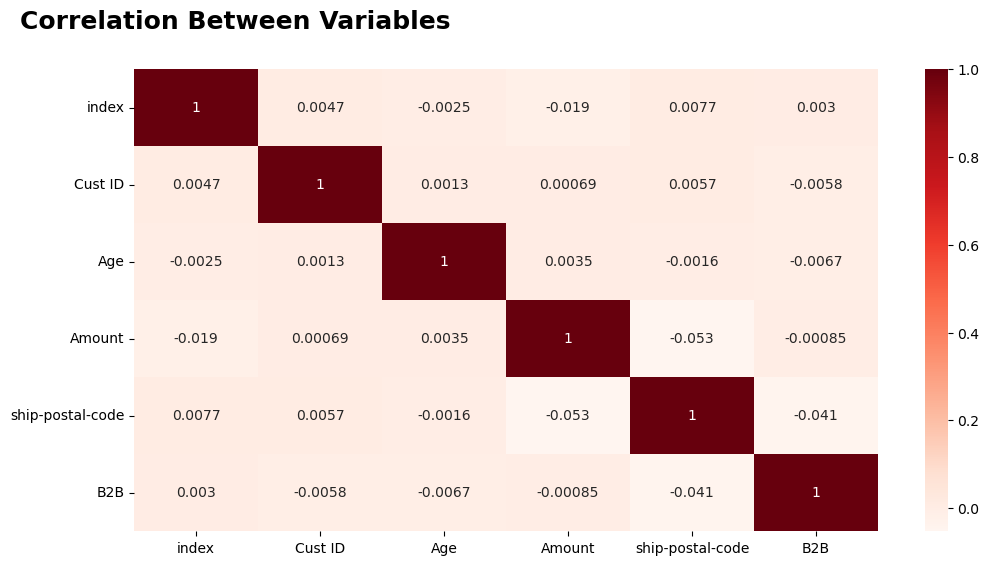

In [67]:
plt.rcParams['figure.figsize'] =(12, 6)
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.suptitle('Correlation Between Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha = "left", fontsize='18', 
             fontfamily='sans-serif', color= "black")

In [68]:
df.to_csv('result.csv', index=False)

### Compare the sales and order in single chart

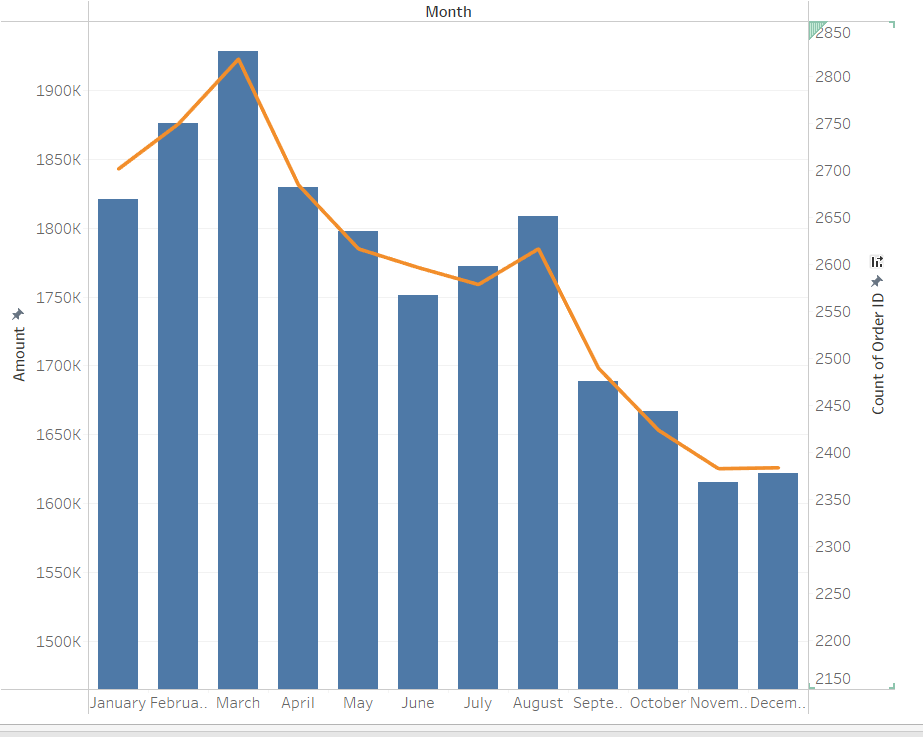

The sales is the sum of amount and order is count of order id against the month. From the given chart, we can see that the total number of products and orders tends to increase in the first quarter, reaching a peak in March. However, the quantity of products shows a declining trend throughout the year, with a slight recovery in August. We see that the data on the total number of customers and the total number of products ordered are correlated with each other.

### Who purchased more, Men or Women?

* The number of orders for men and women.

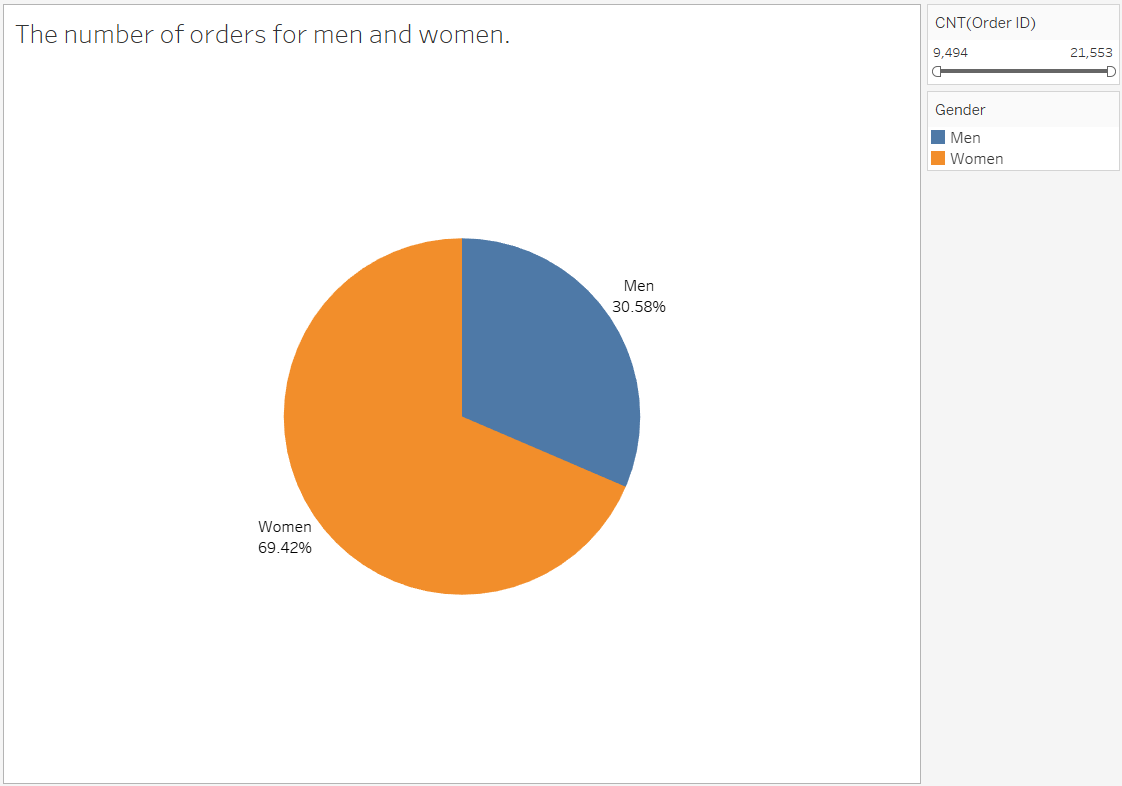

* The total number of products ordered by men and women.

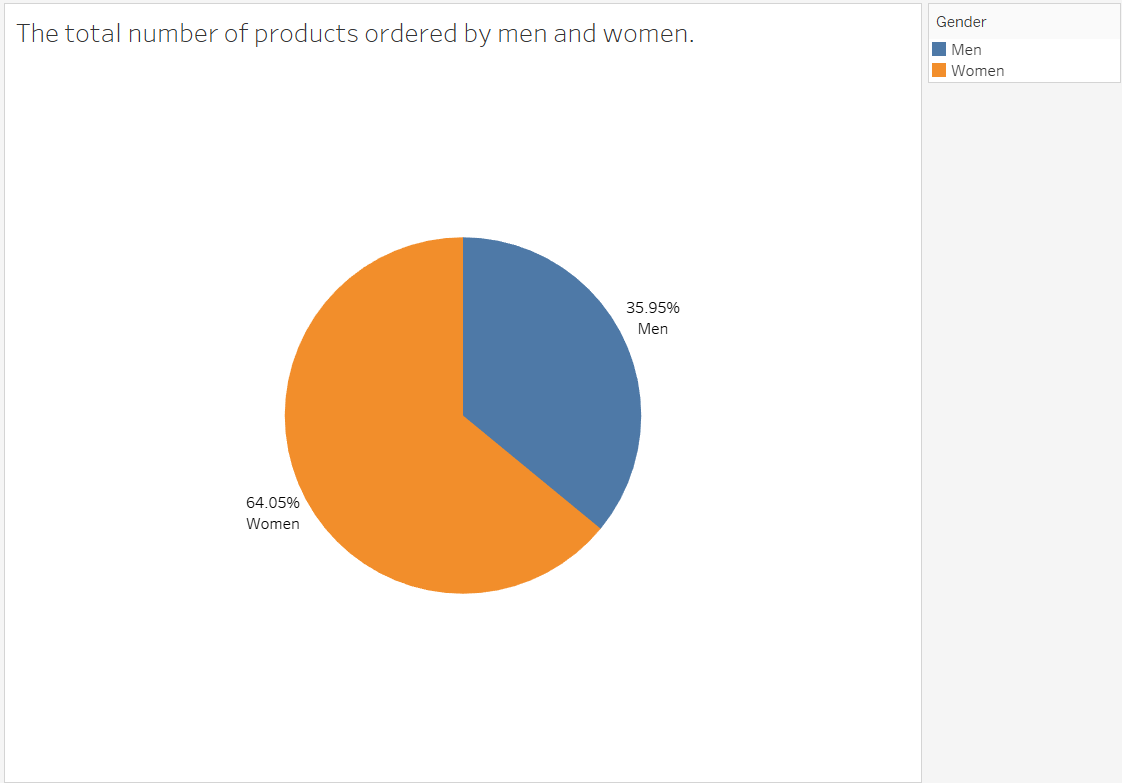

Based on the graph, we can observe that women are the ones with more orders, and the total number of products ordered by women is higher than that of men.

### What is most order status?

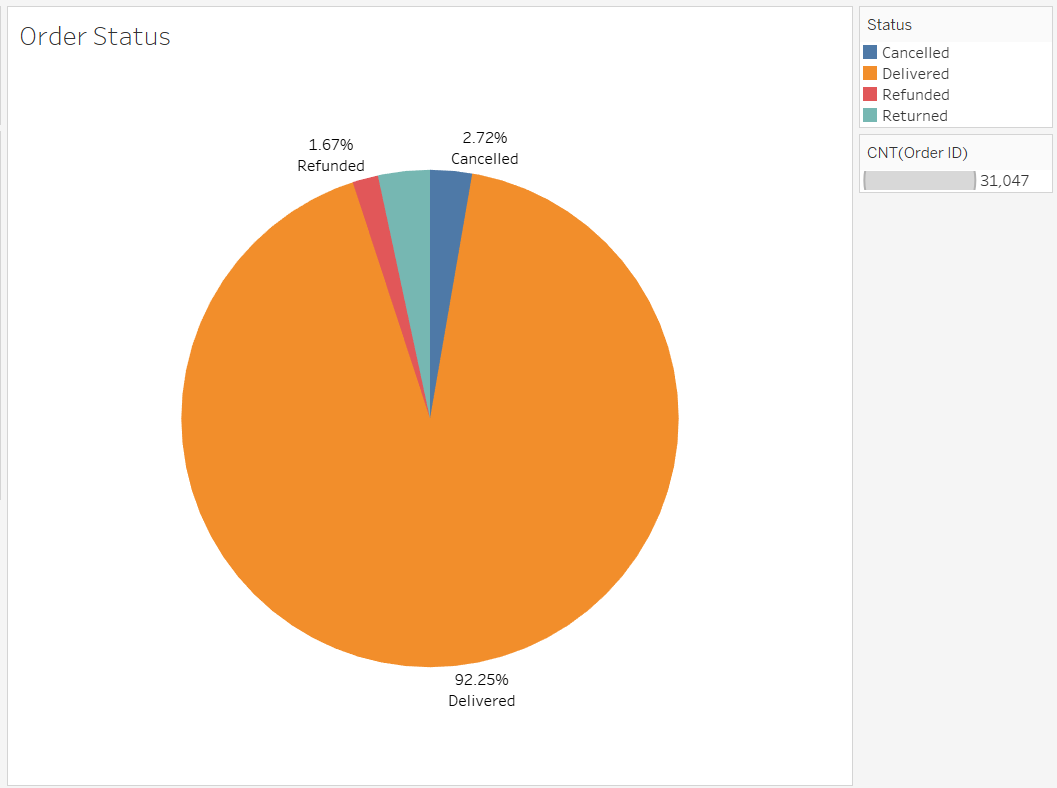

This informs that most of the orders were delivered.

### Top 5 states the contribute to the sales? 

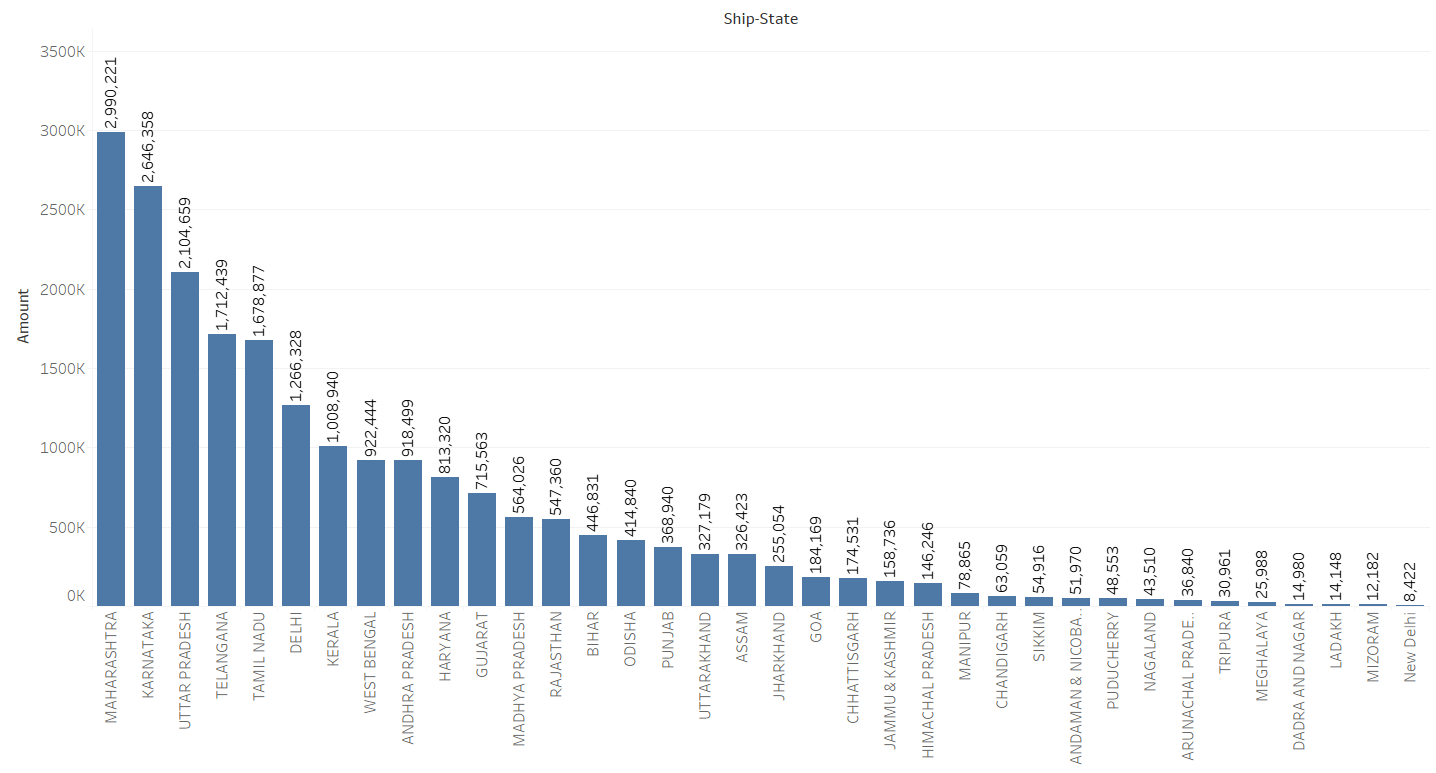

So, the top 5 states with the highest number of ordered products are: MAHARASHTRA, KARNATAKA, UTTARAKHAND, TELANGANA and TAMIL NADU

### Relation between age and gender in purchase?

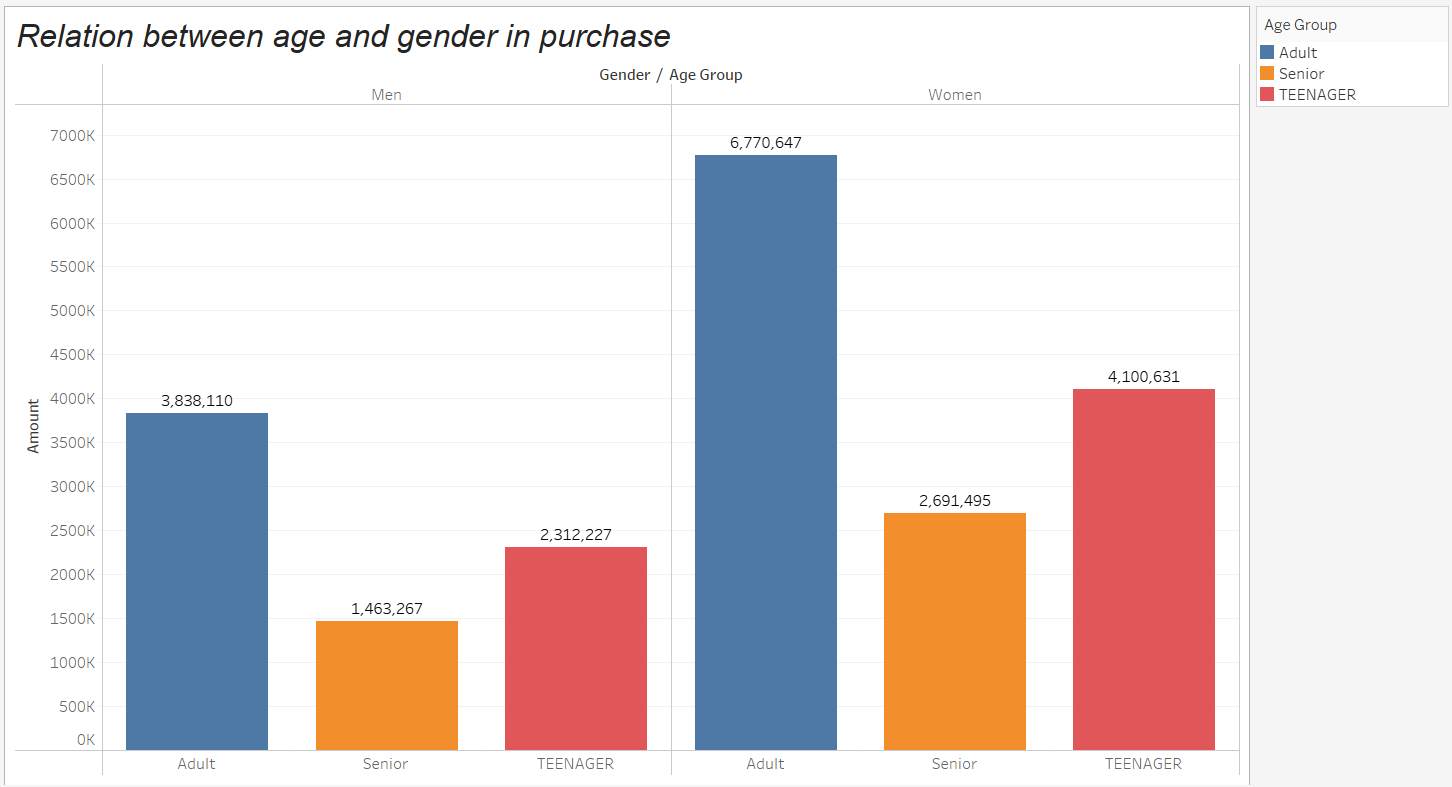

We see that whether male or female, the majority of product purchases are made by the Adult group (from 30 to 50 years old).

### Which channel contributes more to the sales?

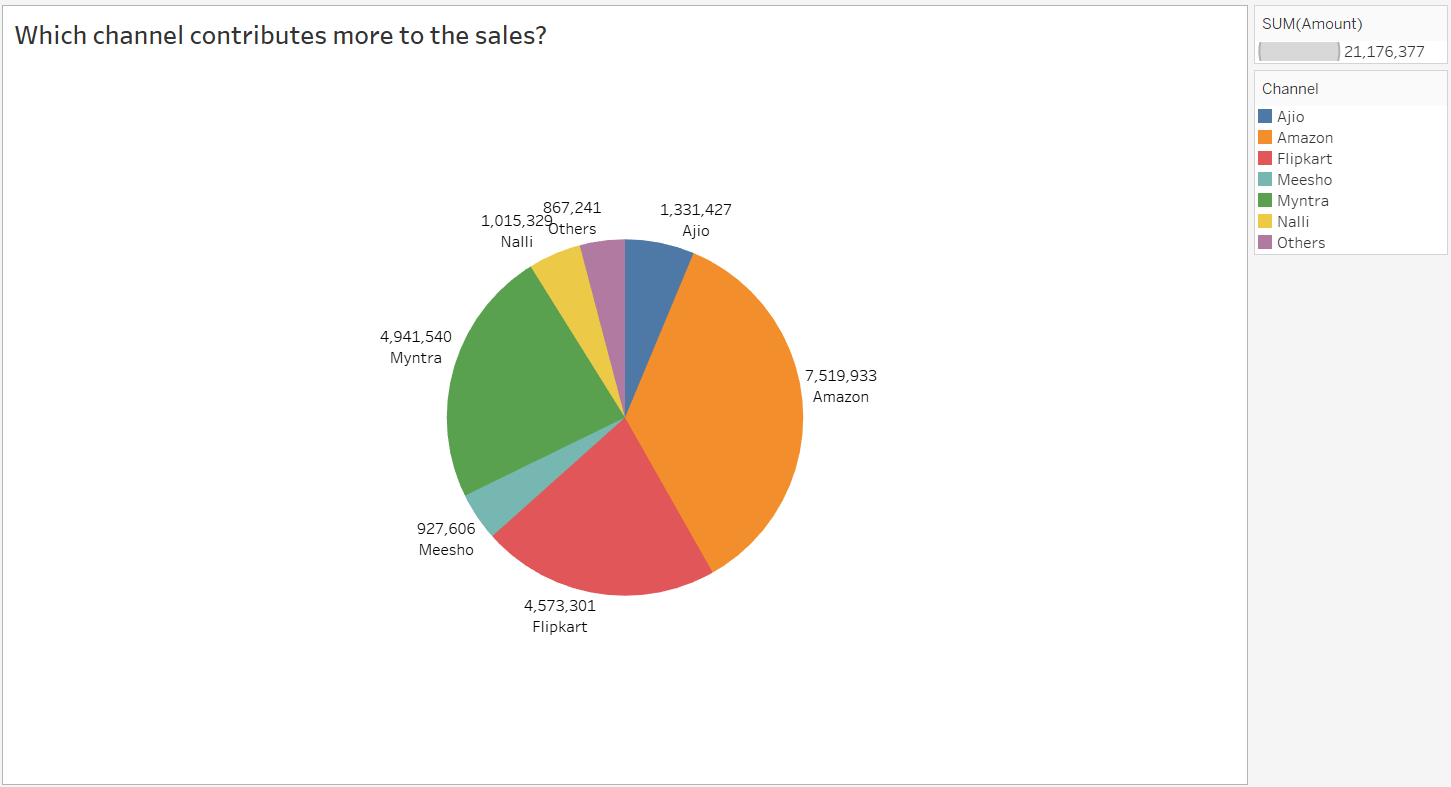

## Dashboard

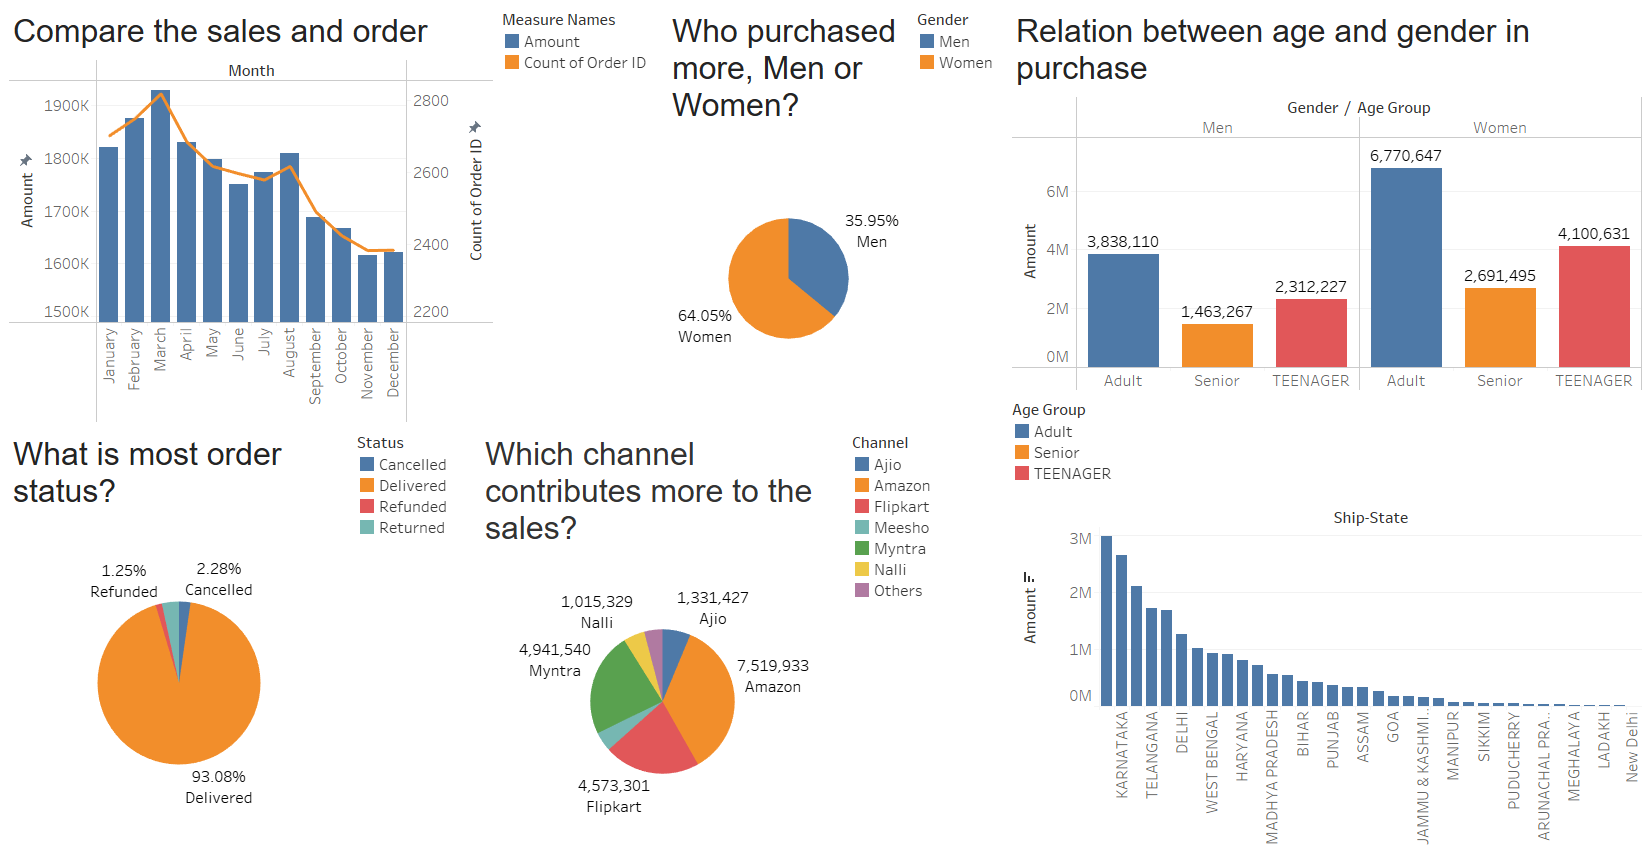

1. Insights:
* Women are the main customer More then 60%.
* Amazon, flikart main platorms that customers buy ~35%.
* Maharashtra, Karnataka, U.P are main states from where purchase made ~50%.
* Adult group (30–49yrs) buying the most ~35%.
2. Recommendation:
* To increase the sale, store owner must target adult women(30-49yrs).
* Targeted ads can be shown to women of Maharashtra, Karnataka, U.P.
* Special discounts can be offered on Amazon, Flipkart to attract the customers.